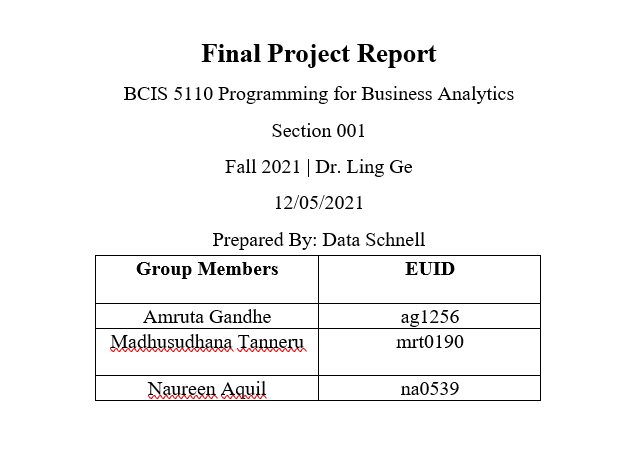

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Executive Summary

When loan company or the banking team are trying to decide whether the user is eligible for loan or not, a lot of loan companies are paying too much attention or even only focus on the parameter like credit history. They often ignore the other parameters or information like Sector_Name, Lender_Terms, Distribution Model, Repayment interval etc. All these have become the root cause of uncertain credit risk. Failed to really understand the actual situation of the borrower, even mistrusting the credit information fabricated by the customer, lays hidden risks for the substantial credit risk. Therefore, several aspects (variables) are taken into account while approving a loan. Predicting whether a borrower will default on loan is a significant concern of most financial institutes. If the lender is too strict, fewer loans get approved, which means there's less interest to collect. But if they're too lax, they end up approving loans that default.
This dataset is about the company that wants to automate the loan eligibility process based on customer details provided while filling online application. To automate this process, they have given a problem to identify the customers segments, those that are eligible for loan amount so that they can specifically target these customers.

We have used data from https://www.kiva.org/build/data-snapshots and is freely available for public use. The data field contains a total of three datasets: Loan.csv, Lenders.csv and Loans_lenders.csv.The loans dataset has 34 columns and 2185241 rows. The lenders dataset has 14 columns and 1578001 rows and the loans_lenders dataset has 2 columns and 2129036 rows.

In this study, loan behavior was analyzed using Logistic Regression Machine Learning Model and Decision Tree Classifier Model. Machine learning model were trained to predict for Status of Loan. Machine learning model was evaluated via K-fold  cross validation, classification report and confusion matrix.

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br> 
Summary Of Problem - Solving Approach

In this study, loan behavior was analyzed using logistic regression machine learning model and decision tree classifier model. Machine learning model was trained to predict for STATUS of loan. Machine learning model was evaluated via K-fold cross validation, classification report and confusion matrix.

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Major Results

Decision Tree Classifier Machine Learning Model was better than Logistic Regression Machine Learning Model.

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br> 
About Kiva 

Kiva (domain name Kiva.org) is a 501(c) (3) non-profit organization headquartered in San Francisco, California with a mission to expand financial access to help underserved communities thrive. Kiva provides crowdfunding opportunities to entrepreneurs as well as students. By operating in microfinance space through internet, it connects borrowers and lenders in the borrower’s country. Borrower has to fill an application to apply for loan which has an expiration date. Once the borrower is approved, the loan is posted to Kiva platform for lenders to support. Loan amount has to be raised before the application expires.  Lenders crowdfund the loans in increments of $25 or more. Borrowers pay the lenders back in about 36 months.

Kiva network includes, borrowers, lenders, trustees and field partners. Field partners and Trustees help connect with borrowers. Field Partners screen borrowers, post loan requests to Kiva for funding, disburse loans on the ground and collect repayments. Most field partners are microfinance institutions, but they can also be schools, NGO’s or social enterprises. Trustees endorse loans, vouching for borrowers who want to apply for direct loans on Kiva, which are loans that aren’t administered by Field Partners. 

In [26]:
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br> 
Improvement Opportunity : Define Phase

### Problem Statement / Discussion of Process Being Examined

The company deals with distribution of loans. Customers first apply for loan and after that the company validates the customer eligibility for loan.Our goal is to understand the determinants of loan repayment and determine the factors and causes of loan default. In order to help lenders, make an informed decision and thereby improve repayment rates, accurate prediction of eligible borrowers will be most beneficial to the company.

### Business Objective 

Descriptive questions to be answered:
1.	What is the average loan amount?
2.	What is the country-wise distribution of loan?
3.	What country got the largest loan?
4.	What are the different types of repayment interval ?
5.	Which sector received the highest loan amount?

Predictive question to be answered: 
1.	Predict the loan status of the application i.e. whether the applicant will be funded or not.

### Type of Problem 

This is a clear classification problem as we need to classify whether the loan status is funded or notfunded. This was resolved using a classification technique like logistic regression and Decision Tree Classifier.

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Importing Libraries

In [27]:
import pandas as pd
import numpy as np

In [28]:
# To display all the columns of the dataset
pd.set_option('display.max_columns', None)

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Data Overview

The dataset is from to https://www.kiva.org/build/data-snapshots  and is freely available for public use.

#### Identification of key measures to evaluate the success of project

1.	STATUS is the response variable and rest all other variables/factors influence the loan application process.
2.	The data field contains a total of 3 datasets: Loans.csv, Lenders.csv, Loans_Lenders.csv
3.  Noise Variables - COUNTRY_CODE, VIDEO_ID, LOAN_USE were dropped
4.  Creation of New Variables - NEW_IMAGE_ID, TIME_LENGTH, PREDISBURSE, YEAR, DAYS

#### Loading loan, lenders and loans_lenders dataset

1. Read in the three tables

In [29]:
ds_loan = pd.read_csv(r'C:\Users\nikhi\OneDrive\Documents\Amruta\New Folder\Fall 2021\BCIS 5110 - Programming For BA\Project\kiva_ds_csv\loans.csv')
ds_lenders = pd.read_csv(r'C:\Users\nikhi\OneDrive\Documents\Amruta\New Folder\Fall 2021\BCIS 5110 - Programming For BA\Project\kiva_ds_csv\lenders.csv')
ds_loans_lenders = pd.read_csv(r'C:\Users\nikhi\OneDrive\Documents\Amruta\New Folder\Fall 2021\BCIS 5110 - Programming For BA\Project\kiva_ds_csv\loans_lenders.csv')

2. Display the information about each dataframe.

#### Loans.csv

Loans.csv – 
1.	This dataset contains all the information about loans.
2.	It has 34 columns and 2185241 rows.

Quantitative Variables:
1.	LOAN_ID – Unique Id for Loan (Primary Key)
2.	FUNDED_AMOUNT – Dollar value for loan funded on Kiva.org             
3.	LOAN_AMOUNT   - Total dollar amount of loan disbursed by the field agent.
4.	IMAGE_ID – Unique Id for Image
5.	VIDEO_ID – Unique Id for loan
6.	CURRENCY_EXCHANGE_COVERAGE_RATE
7.	PARTNER_ID – Unique Id for field partner.
8.	LENDER_TERM – terms and conditions laid by lender for repayment of loan 
9.	NUM_LENDERS_TOTAL – number of lenders who funded the loan amount
10.	NUM_JOURNAL_ENTRIES
11.	NUM_BULK_ENTRIES


Qualitative Variables:
1.	LOAN_NAME – name of person who applied for loan
2.	ORIGINAL_LANGUAGE – language used/spoken by the borrower for loan application
3.	DESCRIPTION - describes details about the borrower and his nature of business
4.	STATUS – is the response variable and provides status of loan application (whether the loan application was funded,   refunded, has expired or funds are being raised).
5.	ACTIVITY_NAME   - loan activity type
6.	SECTOR_NAME - sector of loan activity as shown to lenders              
7.	LOAN_USE - Text description of how loan will be used
8.	COUNTRY_CODE – 2 - letter country ISO code in which loan was disbursed.
9.	COUNTRY_NAME - full name of country in which loan was disbursed.
10.	CURRENCY – currency in which loan was disbursed
11.	POSTED_TIME - date and time when loan was posted on Kiva.org                    
12.	PLANNED_EXPIRATION_TIME - date and time information about when will the borrower’s loan application expire    
13.	DISBURSE_TIME – data and time information when borrowers receive the loan amount
14.	RAISED_TIME – date and time information about how long did it take to raise the borrower’s loan amount.  
15.	TAGS - The Loan Taggers team coordinates the efforts of volunteers who systematically review all of the loans posted to the Kiva website, and applies tags. Loan Taggers assign themselves the loans they wish to tag and can pick a specific country, sector, or activity, or can simply tag the oldest or highest dollar value loans.
16.	BORROWER_NAMES – names of borrowers
17.	BORROWER_GENDERS – genders of borrower
18.	BORROWER_PICTURED 
19.	REPAYMENT_INTERVAL – frequency at which lenders are scheduled to receive installments 
20.	DISTRIBUTION_MODEL – the method in which loan was disbursed (e.g., whether the loan was disbursed through a field partner loan or direct loan disbursement)

In [30]:
# Display the information of loan dataframe
ds_loan.info()
ds_loan.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185241 entries, 0 to 2185240
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

(2185241, 34)

#### Lenders.csv

Lenders.csv – 
1.	This dataset contains details about each lender. 
2.	It has 14 columns and 1578001 rows.

Quantitative Variables:
1.	MAIN_PIC_ID – Unique picture Id
2.	MEMBER_SINCE – how long has the lender been a member with Kiva.org
3.	LOAN_PURCHASE_NUM  
4.	NUM_INVITED – number of people were invited by lender to join the team/cause

Qualitative Variables:
1.	PERMANENT_NAME – Unique Id (primary key) 
2.	DISPLAY_NAME – Display name of the lender
3.	CITY – City where the lender is located
4.	STATE – State of lender’s location
5.	COUNTRY_CODE – country in which lender resides / is currently located.
6.	PERSONAL_URL – URL of lender 
7.	OCCUPATION – occupation of the lender
8.	LOAN_BECAUSE – reason to lend money
9.	OTHER_INFO – other information about lender’s occupation, activities and interests.
10.	INVITED_BY – whether the lender was invited to be a member or not.

In [31]:
# Display the information of lenders dataframe
ds_lenders.info()
ds_lenders.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578001 entries, 0 to 1578000
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   PERMANENT_NAME     1578001 non-null  object 
 1   DISPLAY_NAME       1576397 non-null  object 
 2   MAIN_PIC_ID        517496 non-null   float64
 3   CITY               545427 non-null   object 
 4   STATE              510145 non-null   object 
 5   COUNTRY_CODE       667827 non-null   object 
 6   MEMBER_SINCE       1578001 non-null  int64  
 7   PERSONAL_URL       48898 non-null    object 
 8   OCCUPATION         337415 non-null   object 
 9   LOAN_BECAUSE       152708 non-null   object 
 10  OTHER_INFO         87991 non-null    object 
 11  LOAN_PURCHASE_NUM  1578001 non-null  int64  
 12  INVITED_BY         416298 non-null   object 
 13  NUM_INVITED        1578001 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 168.5+ MB


(1578001, 14)

#### Loans_Lenders.csv

Loans_Lenders.csv –
1.	This dataset has details about lender addresses and their loan id.
2.	It gives the relationship between loan and lenders.
3.	It has 2 columns and 2129036 rows

Quantitative Variables:
1.	LOAN_ID – Unique Id (primary key)

Qualitative Variables:
1.	LENDERS – group of lenders who funded the loan amount.

In [32]:
# Display the information of loans_lenders dataframe
ds_loans_lenders.info()
ds_loans_lenders.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129036 entries, 0 to 2129035
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   LOAN_ID  int64 
 1   LENDERS  object
dtypes: int64(1), object(1)
memory usage: 32.5+ MB


(2129036, 2)

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>  
Discussion of project scope 

- Using Python, perform logistic regression, decision tree k-fold cross validation, confusion matrix.

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br> 
Current State Of The Process: Measure Phase

<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
Data Pre-Processing

### Missing Values in Loans DataFrame

3. Check for missing values of the loans dataframe. You can use sum() to find out the number of missing values.

In [33]:
# Sum of missing values in each variable of the loan.csv dataset
ds_loan.isnull().sum()

LOAN_ID                                  0
LOAN_NAME                            50387
ORIGINAL_LANGUAGE                    46038
DESCRIPTION                          46267
DESCRIPTION_TRANSLATED              455653
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             46038
VIDEO_ID                           2184021
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             46061
COUNTRY_CODE                            36
COUNTRY_NAME                             0
TOWN_NAME                           179002
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     526965
CURRENCY                                 0
PARTNER_ID                               0
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             371834
DISBURSE_TIME                         4276
RAISED_TIME

### Missing Values in Lenders DataFrame

In [34]:
# Sum of missing values in each variable in the lenders.csv dataset
ds_lenders.isnull().sum()

PERMANENT_NAME             0
DISPLAY_NAME            1604
MAIN_PIC_ID          1060505
CITY                 1032574
STATE                1067856
COUNTRY_CODE          910174
MEMBER_SINCE               0
PERSONAL_URL         1529103
OCCUPATION           1240586
LOAN_BECAUSE         1425293
OTHER_INFO           1490010
LOAN_PURCHASE_NUM          0
INVITED_BY           1161703
NUM_INVITED                0
dtype: int64

### Missing Values in Loans_Lenders DataFrame

In [35]:
# Sum of missing values in each variable in the loans_lenders.csv dataset
ds_loans_lenders.isnull().sum()

LOAN_ID    0
LENDERS    0
dtype: int64

###  Current  State Of Target Variable : 'STATUS'

4. First, we check the dependent variable 'STATUS' in the loans dataframe. How many unique values?

In [36]:
# Find unique values of variable STATUS
ds_loan['STATUS'].unique()

array(['funded', 'expired', 'fundRaising', 'refunded'], dtype=object)

### Distribution/Data Patterns of Target Variable: 'STATUS'

5. How many observations for each category of 'STATUS'? (Which function we have learned can do that?)

In [37]:
# Count of each unique value for column STATUS
ds_loan['STATUS'].value_counts()

funded         2076778
expired          93419
refunded          9327
fundRaising       5717
Name: STATUS, dtype: int64

In [38]:
ds_loan.shape

(2185241, 34)

6. Our purpose is to build a model that predicts whether a loan can get funded based on loan features. So, which suggests the loan is funded? Which not? Which should we ignore?<br>
1) Delete the records with the category we can ignore.<br>
2) Recode the three categories to two categories (funded, notfunded)<br>
The recoded variable will be our target variable.

The loan status variable has four unique values:
1. refunded - means the loan is not funded. Funding is not successful. So amount was refunded back to lender.
2. fundRaising - funds are not yet raised
3. expired - didnot get funds
4. funded - received funds / loan amount

We can ignore fundraising column as the number of records in this columns is very less (5717) as compared to funded, expired and refunded. So, even if we include fundraising column, the model will not predict properly any way.

In [39]:
# Deleteing records with category 'fundRaising'
ds_loan = ds_loan.loc[ds_loan['STATUS'] != 'fundRaising']

In [40]:
# Checking the number of rows and columns after deleting the records of category 'fundRaising'
ds_loan.shape

(2179524, 34)

In [41]:
# Recoding the category 'expired' to 'notfunded'
ds_loan['STATUS'] = ds_loan['STATUS'].replace(['expired'], 'notfunded')

In [42]:
# Recoding the category 'refunded' to 'notfunded'
ds_loan['STATUS'] = ds_loan['STATUS'].replace(['refunded'], 'notfunded')

In [43]:
# Checking for unique values for variable 'STATUS' after deleting records with the category 'fundRaising' and 'refunded'
ds_loan['STATUS'].unique()

array(['funded', 'notfunded'], dtype=object)

In [44]:
ds_loan['STATUS'].value_counts()

funded       2076778
notfunded     102746
Name: STATUS, dtype: int64

### Current State of Variable 'LOAN_AMOUNT'

7. Examine the variable 'LOAN_AMOUNT'. <br>
1) Check the distribution. What is the value of outliers if we use 3*IQR to define? <br>
2) Remove the outliers. <br>
3) Create a new variable by taking log of this variable.

In [45]:
ds_loan['LOAN_AMOUNT']

0           300.0
1           300.0
2           475.0
3           500.0
4           925.0
            ...  
2185236     600.0
2185237    5000.0
2185238     250.0
2185239     300.0
2185240     450.0
Name: LOAN_AMOUNT, Length: 2179524, dtype: float64

In [46]:
# To get summary statistics of the variable LOAN_AMOUNT
print(ds_loan['LOAN_AMOUNT'].skew())
ds_loan['LOAN_AMOUNT'].describe() 

120.8355920891376


count    2.179524e+06
mean     8.112930e+02
std      1.671390e+03
min      2.500000e+01
25%      2.750000e+02
50%      5.000000e+02
75%      9.500000e+02
max      5.000000e+05
Name: LOAN_AMOUNT, dtype: float64

In [47]:
Avg_LoanAmount = 8.112930e+02
Avg_LoanAmount

811.293

<p style="font-family: Arial; font-size:1em;color:purple; font-style:bold"><br>
The average 'LOAN AMOUNT' was 811.293.

The skewness value of 120.84 shows that the variable 'LOAN_AMOUNT' has a right-skewed distribution, indicating the presence of extreme higher values. The maximum 'LOAN_AMOUNT' value of 500000 proves this point.

### Identifying Outliers with Interquartile Range 

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1.

In [48]:
# Defining Q1(25th percentile) and Q3(75th percentile) and calculating IQR(Interquartile Range) and printing them
Q1 = ds_loan['LOAN_AMOUNT'].quantile(0.25)
Q3 = ds_loan['LOAN_AMOUNT'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

275.0
950.0
675.0


The above output prints the IQR scores, which can be used to detect outliers.

In [49]:
# Defining the upper and lower limit to detect outliers
upper_limit = Q3 + 3 * IQR
lower_limit = Q1 - 3 * IQR
print(upper_limit)
print(lower_limit)

2975.0
-1750.0


In [50]:
ds_loan.shape

(2179524, 34)

In [51]:
# Applying upper and lower limits to remove outliers

outlier_list = [q for q in ds_loan['LOAN_AMOUNT'] if ((q < upper_limit) and (q > lower_limit))]
filtered_data = ds_loan.loc[ds_loan['LOAN_AMOUNT'].isin(outlier_list)]

ds_loan = filtered_data

In [52]:
# To find the number of observations and columns after removing outliers by applying upper and lower limits
ds_loan.shape

(2089551, 34)

### Log Transformation 

Transformation of the skewed variables may also help correct the distribution of the variables. These could be logarithmic, square root, or square transformations. The most common is the logarithmic transformation, which is done on the 'LOAN_AMOUNT' variable.

In [53]:
ds_loan['LOAN_AMOUNT'].dtype

dtype('float64')

In [54]:
# Creating a new variable 'LOG_LOAN_AMOUNT' by taking log of the variable 'LOAN_AMOUNT' 
# i.e. applying log transformation on variable 'LOAN_AMOUNT'
ds_loan['LOG_LOAN_AMOUNT'] = np.log(ds_loan['LOAN_AMOUNT'])

In [55]:
# To display first 5 records in the loans dataset and 
# display the first five records
ds_loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,LOG_LOAN_AMOUNT
0,1057058,\tLucy,English,Lucy is a married woman and has been blessed w...,Lucy is a married woman and has been blessed w...,300.0,300.0,funded,2157387.0,NaN,Fish Selling,Food,to purchase bundles of fish for resale.,KE,Kenya,Kisauni,shared,0.1,KES,164,2016-04-20 07:05:43.000 +0000,2016-05-24 15:10:07.000 +0000,2016-04-18 07:00:00.000 +0000,2016-04-26 05:00:58.000 +0000,14.0,11,1,1,"#Fabrics, #Parent, #Woman-Owned Business, #Sch...",\tLucy,female,true,monthly,field_partner,5.703782
1,509472,Madosho,English,Madosho is a very responsible man who values h...,NaN,300.0,300.0,funded,942435.0,NaN,General Store,Retail,"to purchase bales of flour, sacks of rice and ...",KE,Kenya,Tiribe,shared,0.1,KES,164,2012-12-19 09:19:01.000 +0000,2013-01-19 06:10:02.000 +0000,2012-12-14 08:00:00.000 +0000,2012-12-20 17:13:36.000 +0000,14.0,6,3,2,NaN,Madosho,male,true,monthly,field_partner,5.703782
2,344324,Marcelina,English,Marcelina is married with 2 child. She is a ve...,NaN,475.0,475.0,funded,886916.0,NaN,Motorcycle Repair,Services,to buy additional tools and equipment for her ...,PH,Philippines,"Toledo, Cebu",shared,0.2,PHP,145,2011-10-10 03:20:31.000 +0000,NaN,2011-09-13 07:00:00.000 +0000,2011-11-01 21:34:58.000 +0000,13.0,13,2,1,NaN,Marcelina,female,true,monthly,field_partner,6.163315
3,768521,Fadzisai,English,Fadzisai is a 30-year-old businesswoman from t...,Fadzisai is a 30-year-old businesswoman from t...,500.0,500.0,funded,1692199.0,NaN,Food Production/Sales,Food,To purchase a larger fryer to produce more chips.,ZW,Zimbabwe,Kwekwe,shared,0.1,USD,305,2014-09-15 09:27:20.000 +0000,2014-10-16 07:30:03.000 +0000,2014-09-20 07:00:00.000 +0000,2014-09-17 14:34:06.000 +0000,8.0,20,2,1,user_favorite,Fadzisai,female,true,monthly,field_partner,6.214608
4,90984,Luisa,Spanish,"Luisa tiene 49 años, vive con su esposo en su ...",Luisa is 49 years old and lives with her husba...,925.0,925.0,funded,276468.0,NaN,Bricks,Construction,Buy sawdust and pay her day workers.,PE,Peru,HUANCAYO,standard,NaN,PEN,71,2009-02-20 14:53:09.000 +0000,NaN,2009-02-05 08:00:00.000 +0000,2009-02-22 21:44:42.000 +0000,11.0,29,4,2,NaN,Luisa,female,true,bullet,field_partner,6.829794


### Dropping Noise Variables: COUNTRY_CODE, VIDEO_ID and LOAN_USE

8. Observe the missing value results from Q3. What is the outcome for variables 'COUNTRY_CODE' and 'COUNTRY_NAME'. What would you do? Do it.

Variable COUNTRY_CODE has 36 missing values (from Question 3) and variable COUNTRY_NAME has no missing values. Thus from COUNTRY_NAME, we can infer COUNTRY_CODE.

Because we have the variable COUNTRY_NAME which has 0 missing values, we can drop the variable COUNTRY_CODE which is represents the first two letters of COUNTRY_NAME.

In [57]:
# Dropping the variable 'COUNTRY_CODE' from loans dataset
ds_loan = ds_loan.drop('COUNTRY_CODE', axis = 1)

In [58]:
# To check if the new variable 'COUNTRY_CODE' is dropped from the loans dataset
ds_loan.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'LOG_LOAN_AMOUNT'],
      dtype='object')

9. Find the number of missing values in variables 'IMAGE_ID', 'VIDEO_ID' and 'LOAN_USE'. What would you do? Do it.

In [59]:
# Count of missing values for column IMAGE_ID
ds_loan['IMAGE_ID'].isnull().sum()

44281

In [60]:
ds_loan['NEW_IMAGE_ID'] = np.where(ds_loan['IMAGE_ID'].isnull()== True,0,1)   

In [61]:
ds_loan['NEW_IMAGE_ID'].value_counts()

1    2045270
0      44281
Name: NEW_IMAGE_ID, dtype: int64

In [62]:
# Count of missing values for column VIDEO_ID
ds_loan['VIDEO_ID'].isnull().sum()

2089095

In [63]:
# Count of missing values for column LOAN_USE
ds_loan['LOAN_USE'].isnull().sum()

44298

In [64]:
# To check unique values of variable 'LOAN_USE'
ds_loan['LOAN_USE'].unique()

array(['to purchase bundles of fish for resale.',
       'to purchase bales of flour, sacks of rice and beans, and instant products.',
       'to buy additional tools and equipment for her repair shop.', ...,
       'to cultivate her 2.1 hectares of beans and 0.7 hectares of corn, and purchase the necessary inputs.',
       'to buy fertilizers, herbicides and pesticides used in farming.',
       'to buy eight sacks of local millet so as to save to pay school fees for her children.'],
      dtype=object)

We would drop variable 'VIDEO_ID' because it has 2089095 missing values (almost 99%).Similarly variable 'LOAN_USE' has text description and has 44298 missing values. It would be difficult to replace missing values of LOAN_USE as it has text description. Thus we would also drop variable 'LOAN_USE'.

In [65]:
# Dropping the variable 'VIDEO_ID' from loans dataset
ds_loan = ds_loan.drop('VIDEO_ID', axis = 1)

In [66]:
# Dropping the variable 'LOAN_USE' from loans dataset
ds_loan = ds_loan.drop('LOAN_USE', axis = 1)

In [67]:
# To check if the variables 'VIDEO_ID' and 'LOAN_USE' are dropped from the loans dataset
ds_loan.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'COUNTRY_NAME', 'TOWN_NAME',
       'CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY',
       'PARTNER_ID', 'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'LOG_LOAN_AMOUNT', 'NEW_IMAGE_ID'],
      dtype='object')

In [68]:
ds_loan.shape

(2089551, 33)

### Creation of New Variable : TIME_LENGTH

10. Create a new variable 'TIME_LENGTH' that is the difference between 'POSTED_TIME' and 'RAISED_TIME'.

In Python, date and time are not a data type of their own, but a module named datetime can be imported to work with the date as well as time. 

Its a combination of date and time along with the attributes year, month, day, hour, minute, second, microsecond, and tzinfo.

In [69]:
# Importing datetime module to work with date as well as time.
from datetime import datetime

In [70]:
# To check datatype of variable 'POSTED_TIME'
ds_loan['POSTED_TIME'].dtype

dtype('O')

In [71]:
# Converting the object data type of 'POSTED_TIME AND RAISED_TIME to datetime format'
ds_loan['POSTED_TIME'] = ds_loan['POSTED_TIME'].apply(pd.Timestamp)
ds_loan['RAISED_TIME'] = pd.to_datetime(ds_loan['RAISED_TIME'])

In [72]:
# To check datatype of variable 'POSTED_TIME' after applying datetime format
ds_loan['POSTED_TIME'].dtype

datetime64[ns, UTC]

In [73]:
# To check datatype of variable 'RAISED_TIME' after applying datetime format
ds_loan['RAISED_TIME'].dtype

datetime64[ns, UTC]

In [74]:
# Creation a new variable 'TIME_LENGTH' from difference between 'POSTED_TIME' and 'RAISED_TIME'
ds_loan['TIME_LENGTH'] = ((ds_loan['RAISED_TIME'] - ds_loan['POSTED_TIME']))

In [75]:
# Replacing missing values in variable TIME_LENGTH with mode
ds_loan['TIME_LENGTH'] = ds_loan['TIME_LENGTH'].fillna(ds_loan['TIME_LENGTH'].mode()[0])

In [76]:
ds_loan['TIME_LENGTH'].isnull().sum()

0

### Creation of New Variable : PREDISBURSE

11. Find the different between 'POSTED_TIME' and 'DISBURSE_TIME'. Create a new variable 'PREDISBURSE' if the 'DISBURSE_TIME' is before 'POSTED_TIME'.

In [77]:
# Converting variable 'DISBURSE_TIME' to datetime format
ds_loan['DISBURSE_TIME'] = pd.to_datetime(ds_loan['DISBURSE_TIME'])

In [78]:
# Creation of new variable tdelta to confirm the condition that DISBURSE_TIME is before POSTED_TIME and vice-versa
tdelta = ds_loan['DISBURSE_TIME'] < ds_loan['POSTED_TIME']
# To know the value count of each value of variable tdelta
tdelta.value_counts()

True     1922960
False     166591
dtype: int64

In [79]:
# Addition of this new variable tdelta in this loans dataset.
ds_loan['tdelta'] = ds_loan['DISBURSE_TIME'] < ds_loan['POSTED_TIME']

In [80]:
# To know the value count of each value of variable tdelta after this variable has been added to the loan dataframe
ds_loan['tdelta'].value_counts()

True     1922960
False     166591
Name: tdelta, dtype: int64

In [81]:
# Creation of new variable 'PREDISBURSE' if the 'DISBURSE_TIME is before the 'POSTED_TIME' and 
# filling all other PREDISBURSE values with 0 for those observations where the 'DISBURSE_TIME' is not before the 'POSTED_TIME'
ds_loan['PREDISBURSE'] = np.where(ds_loan['tdelta'] == True,1,0)   

In [82]:
# To get the count of each value of variable 'PREDISBURSE'
ds_loan['PREDISBURSE'].value_counts()

1    1922960
0     166591
Name: PREDISBURSE, dtype: int64

###  Imputing Missing Values in Variable : 'CURRENCY_EXCHANGE_COVERAGE_RATE'

12. Exame variable 'CURRENCY_EXCHANGE_COVERAGE_RATE'. How many unique values for this variable? How many missing?<br>
Before we rush to replace missing values with mode, we ask the question: is the missing value actually missing or is it something else? We then read the policies on Kiva about exchange coverage. For instance, a lender gives 25 in US dollars and it changes to 250 in another currency. But when the money is repaid at 250 in the other currency, it only exchanges to 20 US dollars. The CURRENCY_EXCHANGE_COVERAGE_RATE measures how much such loss will be covered by the field partners. Some would cover 10% or 20%. So, it is more likely that the missing values indicating the loan does not have any coverage. So, it's more likely means 0.<br>
Replace the missing value with 0.

In [83]:
# Find unique values of variable 'CURRENCY_EXCHANGE_COVERAGE_RATE'
ds_loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].unique()

array([0.1, 0.2, nan, 0. ])

In [84]:
# Missing Values in the variable 'CURRENCY_EXCHANGE_COVERAGE_RATE'
ds_loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].isnull().sum()

494907

In [85]:
# Replace the missing value (nan) with 0
ds_loan['CURRENCY_EXCHANGE_COVERAGE_RATE'] = ds_loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].replace(np.nan, 0)

In [86]:
# To check unique values in the variable 'CURRENCY_EXCHANGE_COVERAGE_RATE after replacing the missing values (nan) with 0'
ds_loan['CURRENCY_EXCHANGE_COVERAGE_RATE'].unique()

array([0.1, 0.2, 0. ])

In [87]:
ds_loan.shape

(2089551, 36)

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Key Input Variables

13. Take a look at the data after we have done the 12 steps above. We will continue the preparation. 
Check the unique values of 'ACTIVITY_NAME' and 'SECTOR_NAME'. You may notice that there are many more activities than sectors and Sector is higher-level categorization of loans. We can choose one of them. To keep the results easier to read. We can keep sector name.
'LOAN_NAME' seems irrelevant to whether a loan is funded. We have not learned how to process 'DESCRIPTION' and 'DESCRIPTION_TRANSLATED'. 'FUNDED_AMOUNT' is the amount that actually raised at the end. Most times it is the same as 'LOAN_AMOUNT'.  After doing similar analysis with every variable, we decide to keep only the following variables in the final analysis: <br>
LOAN_ID<br>
ORIGINAL_LANGUAGE<br>
LOAN_AMOUNT (and the logAmount variable we created)<br>
STATUS<br>
IMAGE_ID (the one we coded to 0/1)<br>
SECTOR_NAME                              
COUNTRY_NAME                             
CURRENCY_POLICY                          
CURRENCY_EXCHANGE_COVERAGE_RATE (the one we tranfromed)<br>
POSTED_TIME  (and the TIME_LENGTH we created)<br>
DISBURSE_TIME (and the PREDISBURSE we created)<br>
RAISED_TIME                        
LENDER_TERM                   
NUM_JOURNAL_ENTRIES  
NUM_BULK_ENTRIES     
REPAYMENT_INTERVAL  
DISTRIBUTION_MODEL 

Create a copy of the dataset that only contains the variables listed above. You may use the list of variable names to slice the dataframe we have from Step 12 in Assignment 8&9.

In [88]:
# To check the columns in the loans dataset
ds_loan.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'COUNTRY_NAME', 'TOWN_NAME',
       'CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY',
       'PARTNER_ID', 'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'LOG_LOAN_AMOUNT', 'NEW_IMAGE_ID', 'TIME_LENGTH',
       'tdelta', 'PREDISBURSE'],
      dtype='object')

In [89]:
# Creating a copy of the dataset that only contains the listed variables
variables = ['LOAN_ID', 'ORIGINAL_LANGUAGE','LOAN_AMOUNT', 'LOG_LOAN_AMOUNT', 'STATUS', 'NEW_IMAGE_ID',
             'SECTOR_NAME', 'COUNTRY_NAME', 'CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE',
             'POSTED_TIME', 'TIME_LENGTH', 'DISBURSE_TIME', 'PREDISBURSE', 'RAISED_TIME', 'LENDER_TERM',
             'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL']

Loan_Analysis = ds_loan[variables]
Loan_Analysis.head()   

,LOAN_ID,ORIGINAL_LANGUAGE,LOAN_AMOUNT,LOG_LOAN_AMOUNT,STATUS,NEW_IMAGE_ID,SECTOR_NAME,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,POSTED_TIME,TIME_LENGTH,DISBURSE_TIME,PREDISBURSE,RAISED_TIME,LENDER_TERM,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1057058,English,300.0,5.703782,funded,1,Food,Kenya,shared,0.1,2016-04-20 07:05:43+00:00,5 days 21:55:15,2016-04-18 07:00:00+00:00,1,2016-04-26 05:00:58+00:00,14.0,1,1,monthly,field_partner
1,509472,English,300.0,5.703782,funded,1,Retail,Kenya,shared,0.1,2012-12-19 09:19:01+00:00,1 days 07:54:35,2012-12-14 08:00:00+00:00,1,2012-12-20 17:13:36+00:00,14.0,3,2,monthly,field_partner
2,344324,English,475.0,6.163315,funded,1,Services,Philippines,shared,0.2,2011-10-10 03:20:31+00:00,22 days 18:14:27,2011-09-13 07:00:00+00:00,1,2011-11-01 21:34:58+00:00,13.0,2,1,monthly,field_partner
3,768521,English,500.0,6.214608,funded,1,Food,Zimbabwe,shared,0.1,2014-09-15 09:27:20+00:00,2 days 05:06:46,2014-09-20 07:00:00+00:00,0,2014-09-17 14:34:06+00:00,8.0,2,1,monthly,field_partner
4,90984,Spanish,925.0,6.829794,funded,1,Construction,Peru,standard,0.0,2009-02-20 14:53:09+00:00,2 days 06:51:33,2009-02-05 08:00:00+00:00,1,2009-02-22 21:44:42+00:00,11.0,4,2,bullet,field_partner


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br> 
Data Exploration

14. Next we start to explore the data. You need to import matplotlib. First, make two histograms for 'LOAN_AMOUNT' and 'logAMount'. How are they different?

### Histogram Of  Variable LOAN AMOUNT

(array([686105., 627837., 294390., 213629., 104890.,  64098.,  38582.,
         22737.,  21451.,  15832.]),
 array([  25. ,  317.5,  610. ,  902.5, 1195. , 1487.5, 1780. , 2072.5,
        2365. , 2657.5, 2950. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Loan Amount Histogram')

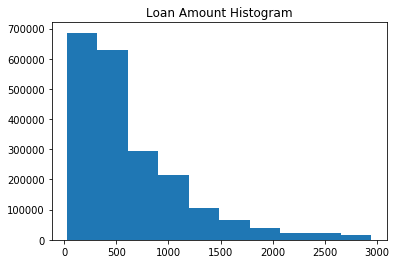

In [90]:
# Importing library matplotlib 
import matplotlib.pyplot as plt

# Creating Histogram of LOAN_AMOUNT
plt.hist(Loan_Analysis['LOAN_AMOUNT'])
plt.title('Loan Amount Histogram')

The histogram of variable 'LOAN_AMOUNT' is skewed in the above histogram.

### Histogram Of Variable LOG_LOAN_AMOUNT

(array([  1910.,   9330.,  65813., 135363., 324124., 438481., 458969.,
        365384., 197221.,  92956.]),
 array([3.21887582, 3.69594429, 4.17301275, 4.65008121, 5.12714967,
        5.60421814, 6.0812866 , 6.55835506, 7.03542352, 7.51249199,
        7.98956045]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Log Amount Histogram')

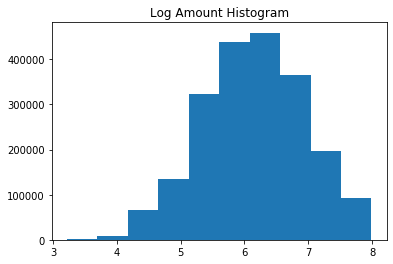

In [91]:
# Creating histogram of LOG_LOAN_AMOUNT
plt.hist(Loan_Analysis['LOG_LOAN_AMOUNT'])
plt.title('Log Amount Histogram')

The histogram of variable 'LOG_LOAN_AMOUNT' has been smoothed out in the above histrogram.

15. What is the total loan amount in each sector? Create a bar chart to demonstrate.

In [92]:
# Total Loan Amount in Each Sector
Sector_Amount = Loan_Analysis.groupby('SECTOR_NAME')['LOAN_AMOUNT'].sum()
Sector_Amount.head()

SECTOR_NAME
Agriculture     361520775.0
Arts             27329725.0
Clothing         79832025.0
Construction     19057775.0
Education        57907725.0
Name: LOAN_AMOUNT, dtype: float64

### Bar Chart of Total Loan Amount in Each Sector

<Figure size 1080x288 with 0 Axes>

Text(0.5, 1.0, 'Total Loan Amount In Each Sector')

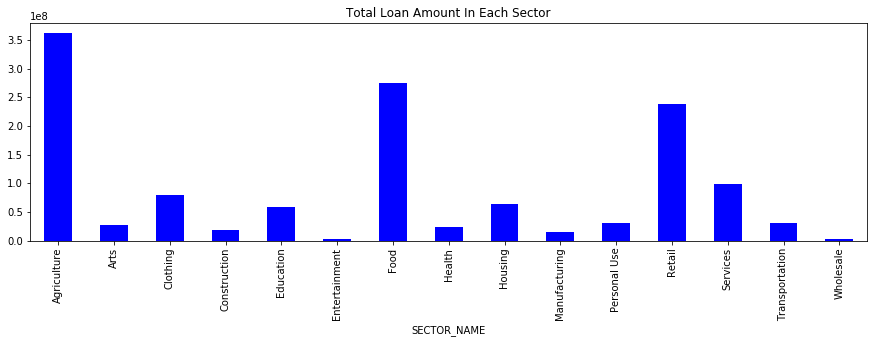

In [93]:
# Bar chart
plt.figure(figsize=(15,4))
Sector_Amount.plot(kind = 'bar', color = 'blue')
plt.title('Total Loan Amount In Each Sector')

<p style="font-family: Arial; font-size:1em;color:purple; font-style:bold"><br>
Agriculture Sector has the highest loan amount.

16. What is the total number of loans in each country? Create a bar chart to demonstrate.

In [94]:
# Total number of Loans in each country
Loans_Country = Loan_Analysis.groupby('COUNTRY_NAME')['LOAN_ID'].count()

### Bar Chart of Total Number of Loans In Each Country

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Total Number Of Loans In Each Country')

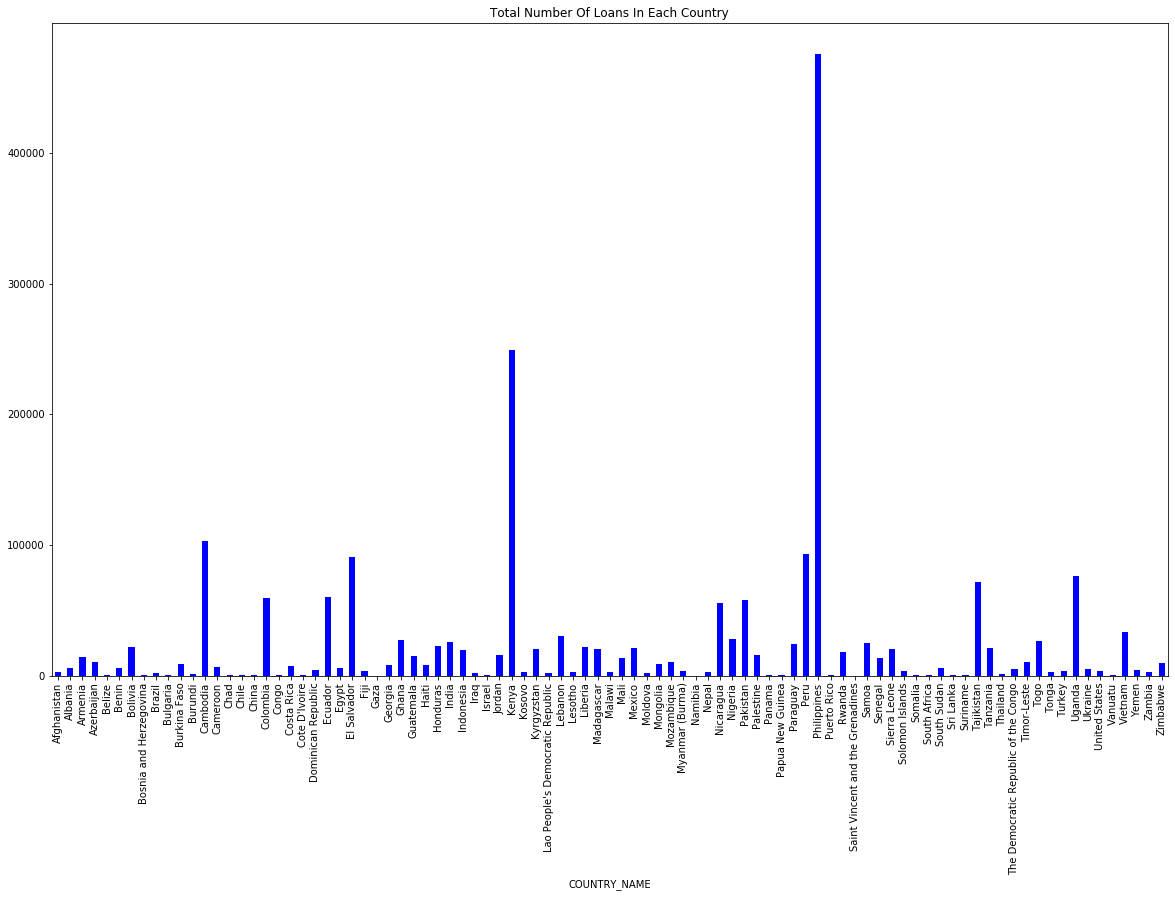

In [95]:
# Bar chart
plt.figure(figsize=(20,12))
Loans_Country.plot(kind = 'bar', color = 'blue')
plt.title('Total Number Of Loans In Each Country')

<p style="font-family: Arial; font-size:1em;color:purple; font-style:bold"><br>
Phillipines has the highest number of total loans.

### Creation of New Variable 'YEAR' required for analysis

17. Change the POSTED_TIME to DateTimeIndex and create a new variable 'Year' using the year of POSTED_TIME. What is the total number of loans in each year? Create a line graph to demonstrate.

In [96]:
# Changing the POSTED_TIME to DateTime Index and creating a new variable YEAR
Loan_Analysis['YEAR'] = pd.DatetimeIndex(Loan_Analysis['POSTED_TIME']).year
Loan_Analysis.head()

C:\Users\nikhi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LOAN_ID,ORIGINAL_LANGUAGE,LOAN_AMOUNT,LOG_LOAN_AMOUNT,STATUS,NEW_IMAGE_ID,SECTOR_NAME,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,POSTED_TIME,TIME_LENGTH,DISBURSE_TIME,PREDISBURSE,RAISED_TIME,LENDER_TERM,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,YEAR
0,1057058,English,300.0,5.703782,funded,1,Food,Kenya,shared,0.1,2016-04-20 07:05:43+00:00,5 days 21:55:15,2016-04-18 07:00:00+00:00,1,2016-04-26 05:00:58+00:00,14.0,1,1,monthly,field_partner,2016
1,509472,English,300.0,5.703782,funded,1,Retail,Kenya,shared,0.1,2012-12-19 09:19:01+00:00,1 days 07:54:35,2012-12-14 08:00:00+00:00,1,2012-12-20 17:13:36+00:00,14.0,3,2,monthly,field_partner,2012
2,344324,English,475.0,6.163315,funded,1,Services,Philippines,shared,0.2,2011-10-10 03:20:31+00:00,22 days 18:14:27,2011-09-13 07:00:00+00:00,1,2011-11-01 21:34:58+00:00,13.0,2,1,monthly,field_partner,2011
3,768521,English,500.0,6.214608,funded,1,Food,Zimbabwe,shared,0.1,2014-09-15 09:27:20+00:00,2 days 05:06:46,2014-09-20 07:00:00+00:00,0,2014-09-17 14:34:06+00:00,8.0,2,1,monthly,field_partner,2014
4,90984,Spanish,925.0,6.829794,funded,1,Construction,Peru,standard,0.0,2009-02-20 14:53:09+00:00,2 days 06:51:33,2009-02-05 08:00:00+00:00,1,2009-02-22 21:44:42+00:00,11.0,4,2,bullet,field_partner,2009


### Line Graph of Total Number of Loans In Each Year

In [97]:
# Total Number of Loans In Each Year
Year_Amount = Loan_Analysis.groupby('YEAR')['LOAN_ID'].count()

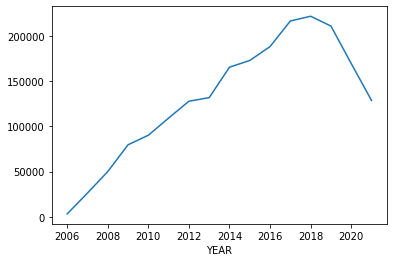

In [98]:
# line Graph
Year_Amount.plot()

### Pivot Table To Show the Average Loan Amount in Each Sector Each Year

18. Create a pivot table to show the average loan amount in each sector each year.

In [99]:
# PivotTable to show the average loan amount in each sector each year
Loan_Analysis.pivot_table('LOAN_AMOUNT', index = 'SECTOR_NAME', columns = 'YEAR')

YEAR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
SECTOR_NAME,,,,,,,,,,,,,,,,
Agriculture,677.455919,657.880235,684.617722,622.929046,676.886867,719.999610,763.815987,783.656150,709.230414,692.247915,653.803030,632.799278,637.335391,639.958081,532.433637,510.894286
Arts,765.441176,556.600877,592.685893,602.074167,736.235038,744.811106,819.075777,705.714286,725.151253,672.922794,636.590595,566.619586,604.724029,721.966019,778.199351,798.175676
Clothing,622.483221,646.504950,681.646895,705.984697,808.771853,809.789304,803.782915,778.017466,725.531682,764.602216,771.240718,748.728352,707.264043,744.876787,682.620831,674.551482
Construction,784.405941,730.501618,723.112892,725.808538,748.578554,806.945177,815.173649,832.622774,796.949489,795.549417,828.313840,749.632153,754.033348,826.397937,817.986334,829.289072
Education,NaN,794.642857,725.274725,666.281139,674.962121,751.921182,859.822185,857.643714,796.262741,877.623796,833.771700,844.908722,800.514445,778.177733,659.811519,352.760163
Entertainment,603.571429,531.250000,681.770833,681.500000,636.285714,801.954733,762.500000,812.931034,859.566327,863.425926,883.210784,987.008734,879.015544,853.333333,890.476190,807.692308
Food,647.490157,595.012937,645.601048,593.716926,645.552294,640.352926,647.228025,641.984904,639.875592,608.840199,613.558477,589.509095,585.212535,612.298638,529.525127,529.580570
Health,809.722222,714.716312,768.494624,714.194009,764.544808,761.039360,787.141217,912.354167,948.925593,854.594530,831.754093,822.399037,853.683460,823.819041,695.066890,684.129276
Housing,497.619048,787.557078,631.327160,608.928571,631.899763,744.293478,849.365606,858.525513,660.587687,751.556973,623.098599,532.803181,573.983936,355.387642,510.843721,467.710145


### Creation of New Variable 'DAYS' Required For Analysis

19. Get the number of days in the TIME_LENGTH variable we created and create a new variable 'Days'using it. Create a scatterplot of 'LOAN_AMOUNT' and 'Days'. What's your observation?

In [100]:
# Creating a new variable 'DAYS' from variable 'TIME_LENGTH'
Loan_Analysis['DAYS'] = Loan_Analysis['TIME_LENGTH'].dt.days

C:\Users\nikhi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
# To show first five observations
Loan_Analysis.head()

,LOAN_ID,ORIGINAL_LANGUAGE,LOAN_AMOUNT,LOG_LOAN_AMOUNT,STATUS,NEW_IMAGE_ID,SECTOR_NAME,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,POSTED_TIME,TIME_LENGTH,DISBURSE_TIME,PREDISBURSE,RAISED_TIME,LENDER_TERM,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,YEAR,DAYS
0,1057058,English,300.0,5.703782,funded,1,Food,Kenya,shared,0.1,2016-04-20 07:05:43+00:00,5 days 21:55:15,2016-04-18 07:00:00+00:00,1,2016-04-26 05:00:58+00:00,14.0,1,1,monthly,field_partner,2016,5
1,509472,English,300.0,5.703782,funded,1,Retail,Kenya,shared,0.1,2012-12-19 09:19:01+00:00,1 days 07:54:35,2012-12-14 08:00:00+00:00,1,2012-12-20 17:13:36+00:00,14.0,3,2,monthly,field_partner,2012,1
2,344324,English,475.0,6.163315,funded,1,Services,Philippines,shared,0.2,2011-10-10 03:20:31+00:00,22 days 18:14:27,2011-09-13 07:00:00+00:00,1,2011-11-01 21:34:58+00:00,13.0,2,1,monthly,field_partner,2011,22
3,768521,English,500.0,6.214608,funded,1,Food,Zimbabwe,shared,0.1,2014-09-15 09:27:20+00:00,2 days 05:06:46,2014-09-20 07:00:00+00:00,0,2014-09-17 14:34:06+00:00,8.0,2,1,monthly,field_partner,2014,2
4,90984,Spanish,925.0,6.829794,funded,1,Construction,Peru,standard,0.0,2009-02-20 14:53:09+00:00,2 days 06:51:33,2009-02-05 08:00:00+00:00,1,2009-02-22 21:44:42+00:00,11.0,4,2,bullet,field_partner,2009,2


### Scatterplot of Loan_Amount and Lender_Term

20. Create a scatterplot of 'LOAN_AMOUNT' and 'LENDER_TERM'. What's your observation?

<Figure size 1080x864 with 0 Axes>

Text(0.5, 1.0, 'Scatterplot of Loan Amount and Lender Term')

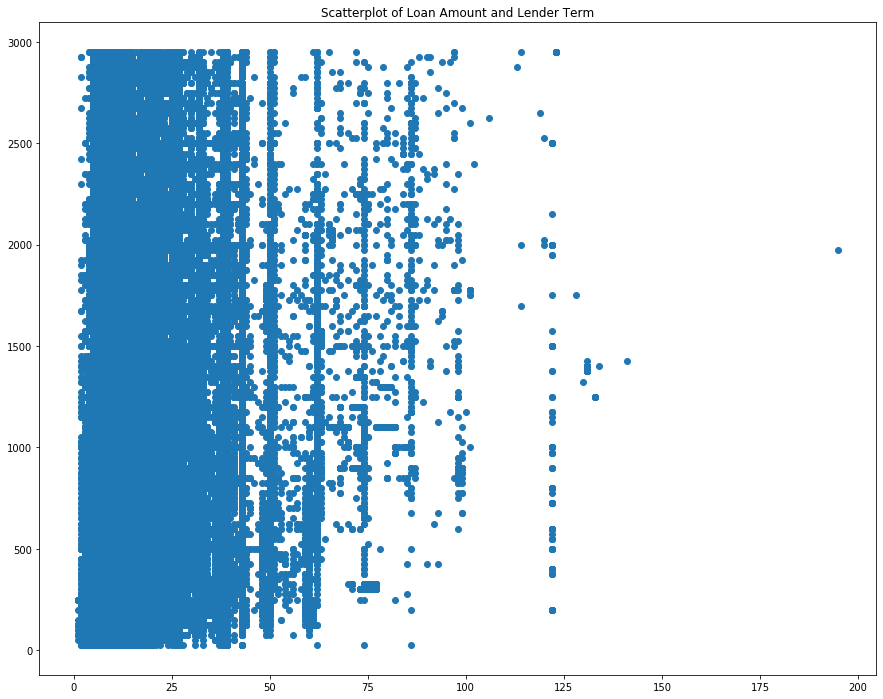

In [102]:
# ScatterPlot 
plt.figure(figsize=(15,12))
plt.scatter(Loan_Analysis['LENDER_TERM'], Loan_Analysis['LOAN_AMOUNT'])
plt.title('Scatterplot of Loan Amount and Lender Term')

### Barplot Of Types of Repayment Interval

<Figure size 1080x576 with 0 Axes>

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.8, 0, '1805415')

Text(0.8, 1, '191596')

Text(0.8, 2, '92540')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Types of repayment interval')

Text(0.5, 1.0, 'Types of repayment intervals with their count')

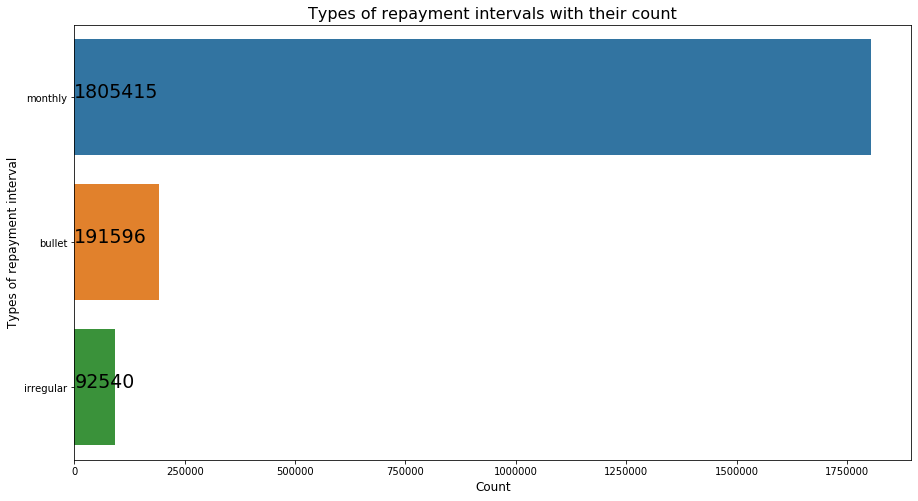

In [104]:
# Types of Repayment Interval
import seaborn as sns
plt.figure(figsize=(15,8))
count = Loan_Analysis['REPAYMENT_INTERVAL'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Types of repayment interval', fontsize=12)
plt.title("Types of repayment intervals with their count", fontsize=16)

<p style="font-family: Arial; font-size:1em;color:purple; font-style:bold"><br>
There were more monthly repayment intervals as compared to bullet and irregular repayment intervals.

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br> 
Analysis And Findings

The loan is one of the most important products of any financial institute. Distribution of loans is the core business part of almost every banks. Effective business strategies for loan application process is an important aspect taken into consideration by financial institutes. Therefore, several aspects (variables) are taken into account while approving a loan. Predicting whether a borrower will default on loan is a significant concern of most financial institutes. If the lender is too strict, fewer loans get approved, which means there's less interest to collect. But if they're too lax, they end up approving loans that default. In this study, loan behavior is analyzed using logistic regression machine learning model. Machine learning model was trained to predict for the STATUS of the loan. Machine learning model was evaluated via K-fold classification technique, confusion matrix.

21. Prepare the data for model analysis. The target variable is 'STATUS'. The predictor variables we want to include:<br>
ORIGINAL_LANGUAGE<br>
the logAmount variable we created<br>
IMAGE_ID (the one we coded to 0/1)<br>
SECTOR_NAME                              
COUNTRY_NAME                             
CURRENCY_POLICY                          
CURRENCY_EXCHANGE_COVERAGE_RATE (the one we tranfromed)<br>
Days we creatd based on the TIME_LENGTH <br>
PREDISBURSE we created<br>
LENDER_TERM                   
NUM_JOURNAL_ENTRIES  
NUM_BULK_ENTRIES     
REPAYMENT_INTERVAL  
DISTRIBUTION_MODEL<br>
Now we can drop all records with missing values at this point.

In [105]:
Loan_Analysis.isnull().sum()

LOAN_ID                                0
ORIGINAL_LANGUAGE                  44281
LOAN_AMOUNT                            0
LOG_LOAN_AMOUNT                        0
STATUS                                 0
NEW_IMAGE_ID                           0
SECTOR_NAME                            0
COUNTRY_NAME                           0
CURRENCY_POLICY                        0
CURRENCY_EXCHANGE_COVERAGE_RATE        0
POSTED_TIME                            0
TIME_LENGTH                            0
DISBURSE_TIME                       1583
PREDISBURSE                            0
RAISED_TIME                        87008
LENDER_TERM                           24
NUM_JOURNAL_ENTRIES                    0
NUM_BULK_ENTRIES                       0
REPAYMENT_INTERVAL                     0
DISTRIBUTION_MODEL                     0
YEAR                                   0
DAYS                                   0
dtype: int64

In [106]:
# Count of each unique value of variable STATUS
Loan_Analysis['STATUS'].value_counts()

funded       1996238
notfunded      93313
Name: STATUS, dtype: int64

<p style="font-family: Arial; font-size:1em;color:purple; font-style:bold"><br>
Instead of dropping records with missing values at this point, I will be replacing the categorical variables with mode and continuous variables with median.As we are not using DISBURSE_TIME and RAISED_TIME for model analysis, I will not be imputing missing values in these variables.Moreover, the number of missing observations/values is less than 5% to the total number of obeservations. So replacing them with median/ mode will work.I will be imputing missing values instead of dropping them because when I drop the variables with missing values from Loan_Analysis, the number(value_counts) of nonfunded observations in variable STATUS changes/decreases from 93313 to 1 as all the records/observations having missing values or nan are dropped. This causes an error like the ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'funded' and logistic regression model doesnot run.</p>

In [107]:
Loan_Analysis['LENDER_TERM'].isnull().sum()

24

In [108]:
Loan_Analysis['ORIGINAL_LANGUAGE'].value_counts()

English       1435985
Spanish        437635
French         100684
Russian         56260
Portuguese      11411
Vietnamese       1965
Indonesian       1000
Arabic            330
Name: ORIGINAL_LANGUAGE, dtype: int64

In [109]:
# Replacing missing values in variable 'LENDER_TERM' with median
Loan_Analysis['LENDER_TERM'] = Loan_Analysis['LENDER_TERM'].fillna(Loan_Analysis['LENDER_TERM'].median())

C:\Users\nikhi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
Loan_Analysis['LENDER_TERM'].isnull().sum()

0

In [111]:
# Replacing missing values in variable 'ORIGINAL_LANGUAGE' with mode
Loan_Analysis['ORIGINAL_LANGUAGE'] = Loan_Analysis['ORIGINAL_LANGUAGE'].fillna(Loan_Analysis['ORIGINAL_LANGUAGE'].mode()[0])

C:\Users\nikhi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
Loan_Analysis['ORIGINAL_LANGUAGE'].value_counts()

English       1480266
Spanish        437635
French         100684
Russian         56260
Portuguese      11411
Vietnamese       1965
Indonesian       1000
Arabic            330
Name: ORIGINAL_LANGUAGE, dtype: int64

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Defining our Target(Dependent) Variable and Independent (X) variables

In [113]:
# Defining our Target variable(STATUS)
Target = Loan_Analysis['STATUS']

# Variables required in our dataset
Variables_Required = ['ORIGINAL_LANGUAGE', 'LOG_LOAN_AMOUNT', 'NEW_IMAGE_ID', 'SECTOR_NAME', 'COUNTRY_NAME',
                      'CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'DAYS', 'PREDISBURSE', 'LENDER_TERM',
                     'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL']


X = Loan_Analysis[Variables_Required]

In [114]:
X.isnull().sum()

ORIGINAL_LANGUAGE                  0
LOG_LOAN_AMOUNT                    0
NEW_IMAGE_ID                       0
SECTOR_NAME                        0
COUNTRY_NAME                       0
CURRENCY_POLICY                    0
CURRENCY_EXCHANGE_COVERAGE_RATE    0
DAYS                               0
PREDISBURSE                        0
LENDER_TERM                        0
NUM_JOURNAL_ENTRIES                0
NUM_BULK_ENTRIES                   0
REPAYMENT_INTERVAL                 0
DISTRIBUTION_MODEL                 0
dtype: int64

22. Generate dummies for all categorical variables

In [115]:
# Defining Categorical Variables
Categorical = ['ORIGINAL_LANGUAGE','SECTOR_NAME', 'COUNTRY_NAME', 'CURRENCY_POLICY', 'PREDISBURSE', 
       'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL']

# Generating dummies for all categorical variables
X = pd.get_dummies(X, columns = Categorical, drop_first = True)
X.head()

,LOG_LOAN_AMOUNT,NEW_IMAGE_ID,CURRENCY_EXCHANGE_COVERAGE_RATE,DAYS,LENDER_TERM,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,ORIGINAL_LANGUAGE_English,ORIGINAL_LANGUAGE_French,ORIGINAL_LANGUAGE_Indonesian,ORIGINAL_LANGUAGE_Portuguese,ORIGINAL_LANGUAGE_Russian,ORIGINAL_LANGUAGE_Spanish,ORIGINAL_LANGUAGE_Vietnamese,SECTOR_NAME_Arts,SECTOR_NAME_Clothing,SECTOR_NAME_Construction,SECTOR_NAME_Education,SECTOR_NAME_Entertainment,SECTOR_NAME_Food,SECTOR_NAME_Health,SECTOR_NAME_Housing,SECTOR_NAME_Manufacturing,SECTOR_NAME_Personal Use,SECTOR_NAME_Retail,SECTOR_NAME_Services,SECTOR_NAME_Transportation,SECTOR_NAME_Wholesale,COUNTRY_NAME_Albania,COUNTRY_NAME_Armenia,COUNTRY_NAME_Azerbaijan,COUNTRY_NAME_Belize,COUNTRY_NAME_Benin,COUNTRY_NAME_Bolivia,COUNTRY_NAME_Bosnia and Herzegovina,COUNTRY_NAME_Brazil,COUNTRY_NAME_Bulgaria,COUNTRY_NAME_Burkina Faso,COUNTRY_NAME_Burundi,COUNTRY_NAME_Cambodia,COUNTRY_NAME_Cameroon,COUNTRY_NAME_Chad,COUNTRY_NAME_Chile,COUNTRY_NAME_China,COUNTRY_NAME_Colombia,COUNTRY_NAME_Congo,COUNTRY_NAME_Costa Rica,COUNTRY_NAME_Cote D'Ivoire,COUNTRY_NAME_Dominican Republic,COUNTRY_NAME_Ecuador,COUNTRY_NAME_Egypt,COUNTRY_NAME_El Salvador,COUNTRY_NAME_Fiji,COUNTRY_NAME_Gaza,COUNTRY_NAME_Georgia,COUNTRY_NAME_Ghana,COUNTRY_NAME_Guatemala,COUNTRY_NAME_Haiti,COUNTRY_NAME_Honduras,COUNTRY_NAME_India,COUNTRY_NAME_Indonesia,COUNTRY_NAME_Iraq,COUNTRY_NAME_Israel,COUNTRY_NAME_Jordan,COUNTRY_NAME_Kenya,COUNTRY_NAME_Kosovo,COUNTRY_NAME_Kyrgyzstan,COUNTRY_NAME_Lao People's Democratic Republic,COUNTRY_NAME_Lebanon,COUNTRY_NAME_Lesotho,COUNTRY_NAME_Liberia,COUNTRY_NAME_Madagascar,COUNTRY_NAME_Malawi,COUNTRY_NAME_Mali,COUNTRY_NAME_Mexico,COUNTRY_NAME_Moldova,COUNTRY_NAME_Mongolia,COUNTRY_NAME_Mozambique,COUNTRY_NAME_Myanmar (Burma),COUNTRY_NAME_Namibia,COUNTRY_NAME_Nepal,COUNTRY_NAME_Nicaragua,COUNTRY_NAME_Nigeria,COUNTRY_NAME_Pakistan,COUNTRY_NAME_Palestine,COUNTRY_NAME_Panama,COUNTRY_NAME_Papua New Guinea,COUNTRY_NAME_Paraguay,COUNTRY_NAME_Peru,COUNTRY_NAME_Philippines,COUNTRY_NAME_Puerto Rico,COUNTRY_NAME_Rwanda,COUNTRY_NAME_Saint Vincent and the Grenadines,COUNTRY_NAME_Samoa,COUNTRY_NAME_Senegal,COUNTRY_NAME_Sierra Leone,COUNTRY_NAME_Solomon Islands,COUNTRY_NAME_Somalia,COUNTRY_NAME_South Africa,COUNTRY_NAME_South Sudan,COUNTRY_NAME_Sri Lanka,COUNTRY_NAME_Suriname,COUNTRY_NAME_Tajikistan,COUNTRY_NAME_Tanzania,COUNTRY_NAME_Thailand,COUNTRY_NAME_The Democratic Republic of the Congo,COUNTRY_NAME_Timor-Leste,COUNTRY_NAME_Togo,COUNTRY_NAME_Tonga,COUNTRY_NAME_Turkey,COUNTRY_NAME_Uganda,COUNTRY_NAME_Ukraine,COUNTRY_NAME_United States,COUNTRY_NAME_Vanuatu,COUNTRY_NAME_Vietnam,COUNTRY_NAME_Yemen,COUNTRY_NAME_Zambia,COUNTRY_NAME_Zimbabwe,CURRENCY_POLICY_standard,PREDISBURSE_1,REPAYMENT_INTERVAL_irregular,REPAYMENT_INTERVAL_monthly,DISTRIBUTION_MODEL_field_partner
0,5.703782,1,0.1,5,14.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,5.703782,1,0.1,1,14.0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,6.163315,1,0.2,22,13.0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,6.214608,1,0.1,2,8.0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,6.829794,1,0.0,2,11.0,4,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Model Analysis

Logistic Regression and Decision Tree Classifier was used for model analysis.
Logistic Regression is one of the simplest and commonly used machine learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problems. It describes and estimates the relationship between one binary variable (STATUS) and independent variables.
Logistic regression was used to fit into the loan data.

Step 1 : Logistic regression model was constructed to avoid overfitting and conducted a confusion matrix to see how the model performed on the loan prediction dataset.

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Decision Tree consists of :
- Nodes : Test for the value of a certain attribute.
- Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
- Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).

Classification trees (Funded/Notfunded types) : Here the decision variable (STATUS) is Categorical/ discrete.
Such a tree is built through a process known as binary recursive partitioning. This is an iterative process of splitting the data into partitions, and then splitting it up further on each of the branches.

- Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG) (reduction in uncertainty towards the final decision).
- In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each leaf node all belong to the same class.
- In practice, we may set a limit on the depth of the tree to prevent overfitting. We compromise on purity here somewhat as the final leaves may still have some impurity.

Step 2: Decision Tree Classifier was performed to avoid overfitting and conducted a confusion matrix to see how the model performed on the loan prediction dataset.

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Model Evaluation

Entire data was split into two sets, one is used to train the model upon and the other is kept as a holdout set which is used to check how the model behaves with completely unseen data. The figure below summarizes the entire idea of performing the split.


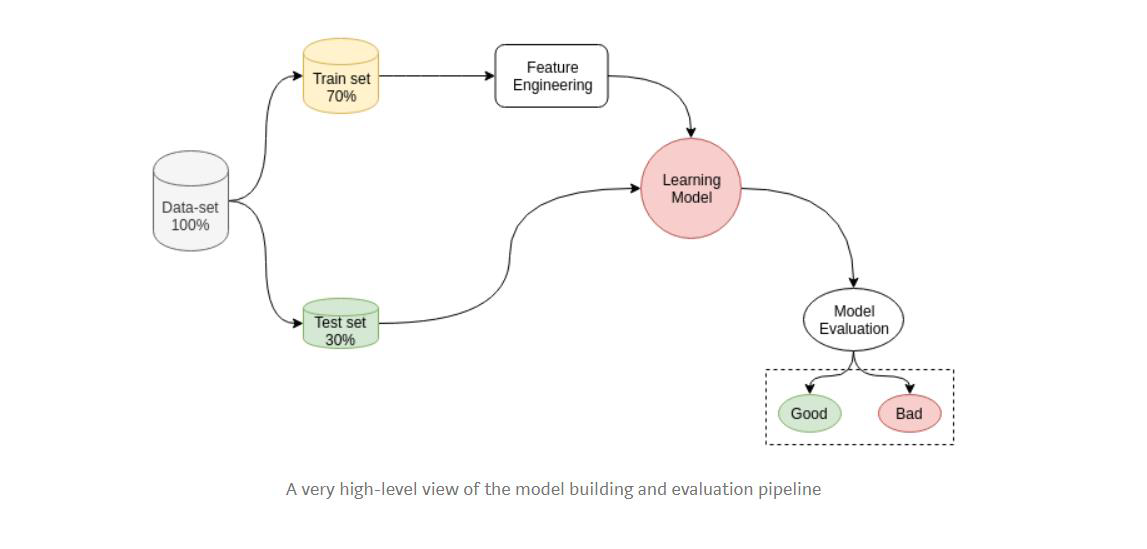

Picture Source: https://towardsdatascience.com/cross-validation-430d9a5fee22

<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
Splitting the data

The data was split into training set (67%), and test set (33%). Training set was used to fit the model, and test set was used to evaluate the best model to get an estimation of generalization error.

23. Prepare training and test datasets

In [116]:
# Preparing training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size = 0.33, random_state = 1)

X is the original entire set of features and y is the entire set of corresponding true labels. The above function splits the entire set into train and test set with a ratio of 0.33 assigned for the test set. The  data set will be randomly shuffled before the split.

In [117]:
Loan_Analysis['STATUS'].value_counts()

funded       1996238
notfunded      93313
Name: STATUS, dtype: int64

In [118]:
# There are no missing values in our train dataset
X_train.isnull().any()

LOG_LOAN_AMOUNT                     False
NEW_IMAGE_ID                        False
CURRENCY_EXCHANGE_COVERAGE_RATE     False
DAYS                                False
LENDER_TERM                         False
                                    ...  
CURRENCY_POLICY_standard            False
PREDISBURSE_1                       False
REPAYMENT_INTERVAL_irregular        False
REPAYMENT_INTERVAL_monthly          False
DISTRIBUTION_MODEL_field_partner    False
Length: 123, dtype: bool

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Model Fitting Using Logistic Regression 

24. Fit a logistic regression model.

In [119]:
# Fit the model using Logistic Regression 
from sklearn.linear_model import LogisticRegression
logRegressor = LogisticRegression()
logRegressor.fit(X_train, y_train)

C:\Users\nikhi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

25. Get the predicted results for the test dataset

In [120]:
# Get the prediction
y_pred = logRegressor.predict(X_test)
y_pred[:10]

array(['funded', 'funded', 'funded', 'funded', 'funded', 'funded',
       'funded', 'funded', 'funded', 'funded'], dtype=object)

<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
Accuracy Rate

26. Evaluate the model using accuracy rate and confusion matrix.

In [121]:
# Calculate the accuracy rate
from sklearn.metrics import accuracy_score
print('The accuracy score using Logistic Regression Model is:')
accuracy_score(y_true = y_test, y_pred = y_pred)

The accuracy score using Logistic Regression Model is:


0.9973896094855791

<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
Classification Report

There are several metrics that can be deduced from the confusion matrix, such as –


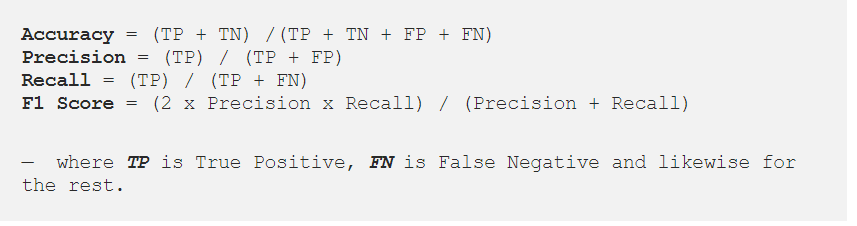


• Precision:
Precision is defined as the ratio of the total number of correctly classified positive classes divided by the total number of predicted positive classes. Or, out of all the predictive positive classes, how much we predicted correctly. Precision should be high.

• Recall or Sensitivity:
Recall is defined as the ratio of the total number of correctly classified positive classes divide by the total number of positive classes. Or, out of all the positive classes, how much we have predicted correctly. Recall should be high.

• F-score or F-1 score:
It is difficult to compare two models with different Precision and Recall. So, to make them comparable, we use F-Score. It is the Harmonic Mean of Precision and Recall. As compared to Arithmetic Mean, Harmonic Mean punishes the extreme values more. F-score should be high.

In [122]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[658631    447]
 [  1353  29121]]
              precision    recall  f1-score   support

      funded       1.00      1.00      1.00    659078
   notfunded       0.98      0.96      0.97     30474

    accuracy                           1.00    689552
   macro avg       0.99      0.98      0.98    689552
weighted avg       1.00      1.00      1.00    689552



<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
Confusion Matrix

It provides a summary of the predictive results in a classification problem. Correct and Incorrect predictions are summarized in the table with their values and broken down by each class.

- True Positive: Both predicted and actual value is true. The predicted and actual value of loan status is 1 (or funded)

- True Negative: Both the predicted and actual value is false. The predicted value of loan status not funded (i.e. it is 0) and it actually is not funded (0).

- False Positive (Type I Error): The predicted value is positive and it’s false. The predicted value of loan_status is 1 (funded) but its actual value is not (it is 0 or Not funded).

- False Negative (Type II Error): The predicted value is negative and it’s false. The predicted value of loan_status is not 1 (not funded) but its actual value is 1(funded).

([<matplotlib.axis.XTick at 0x132fc873b88>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x132fc876f48>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

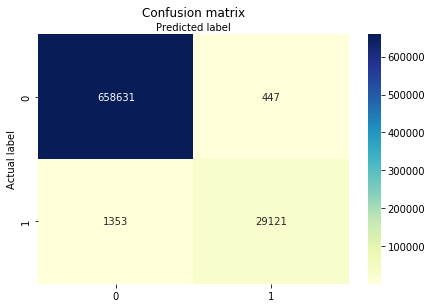

In [123]:
# Build the confusion matrix(2nd way)
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
K-Fold Cross Validation

K-fold cross validation was applied to try to reduce over-fitting. The idea was to estimate the predictive performance of the model for data that is not yet known. Cross-validation is a robust form, repeats the experiment several times, using several different parts of the training set as validation sets. This provides a more accurate analysis of how the model generalizes to previously unknown data. In order to run the K-Fold, the dataset was split into a number of folds, in this case 5. So then, each fold was divided into a train and test subset each with its own features and targets. Each classifier was trained using the training features and targets, then they predict the result using the fold test features. Finally, the performance of the classifier was measured using acc: accuracy In K-fold cross validation repeats the model evaluation process multiple times (instead of one time) and calculates the mean skill. The mean estimate of any parameter is less biased than a one-shot estimate. There is still some bias though. 

In [124]:
# cross-validation 
from sklearn.model_selection import cross_val_score
scoresR= cross_val_score(logRegressor, X, Target, cv=5)
scoresR

C:\Users\nikhi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nikhi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

array([0.9972195 , 0.99717882, 0.99744203, 0.99744682, 0.9973176 ])

In [126]:
# Mean of accuracy scores obtained using K-Fold Cross Validation
scoresR = np.mean(scoresR)
scoresR

0.9973209556031186

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br> 
Model Fitting Using Decision Tree Classifier

27. Repeat Step 24-26 using another classification method. Which method has better results?

In [127]:
# Fit the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

classifierT = DecisionTreeClassifier(max_depth=20)
classifierT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [128]:
# Get the prediction
y_preddt = classifierT.predict(X_test)
y_preddt[:10]

array(['funded', 'funded', 'funded', 'funded', 'funded', 'funded',
       'funded', 'funded', 'funded', 'funded'], dtype=object)

<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
Classification Report

In [129]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_preddt))
print(classification_report(y_test, y_preddt))

[[658901    177]
 [   806  29668]]
              precision    recall  f1-score   support

      funded       1.00      1.00      1.00    659078
   notfunded       0.99      0.97      0.98     30474

    accuracy                           1.00    689552
   macro avg       1.00      0.99      0.99    689552
weighted avg       1.00      1.00      1.00    689552



<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
Confusion Matrix

([<matplotlib.axis.XTick at 0x133484301c8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x13348433448>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

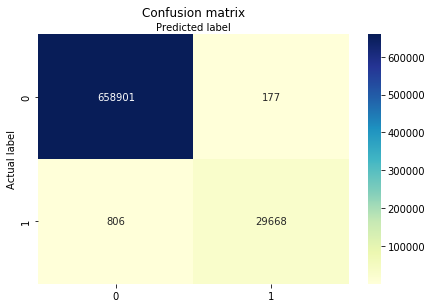

In [130]:
# Build the confusion matrix.
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_preddt)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
Accuracy Rate

In [131]:
# Calculate the accuracy rate
from sklearn.model_selection import cross_val_score
print('The accuracy score using Decision Tree Classifier Model is:')
accuracy_score(y_true = y_test, y_pred = y_preddt)

The accuracy score using Decision Tree Classifier Model is:


0.9985744367357356

<p style="font-family: Arial; font-size:1.55em;color:#2462C0; font-style:bold"><br> 
K- Fold Cross Validation

In [132]:
# cross-validation 
scoresT=cross_val_score(classifierT, X, Target, cv=5)
scoresT

array([0.99871743, 0.99856907, 0.99858582, 0.99872461, 0.99858821])

In [134]:
# Mean of accuracy scores obtained using K-Fold Cross Validation
scoresT = np.mean(scoresT)
scoresT

0.9986370277249023

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Recommendations : The Improve Phase

1. Kiva dataset is an imbalanced dataset. This means that there is a class imbalance in the dataset. There is imbalance because our target (dependent) variable STATUS has 2076778 funded values and 102746 notfunded values.

2. In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes. As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. 

3. Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.

4. Imbalanced Data Handling Techniques: There are mainly 2 mainly algorithms that are widely used for handling imbalanced class distribution. 


- SMOTE(Synthetic Minority Over Sampling Technique)- (Oversampling) -
It selects samples in the minority class that are close and then draws lines between them. New sample points are located on these lines.To be more precise, a random sample is chosen, and then a KNN (K -Nearest Neighbour) algorithm is used to select neighbors to which lines are drawn. With this procedure, you can create as many synthetic samples as needed. This makes SMOTE perfect for datasets of all sizes.The only real downside is that synthetic examples are created without “consulting” the majority class. This could result in overlapping samples in both classes.

- Near Miss Algorithm(Undersampling) -
Near Miss Algorithm is an algorithm that can help in balancing an imbalanced dataset. It can be grouped under undersampling algorithms and is an efficient way to balance the data. The algorithm does this by looking at the class distribution and randomly eliminating samples from the larger class. When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution. 

The steps taken by this algorithm are:

The algorithm first calculates the distance between all the points in the larger class with the points in the smaller class. This can make the process of undersampling easier. 
Select instances of the larger class that have the shortest distance with the smaller class. These n classes need to be stored for elimination. 
If there are m instances of smaller class then the algorithm will return m * n instances of larger class.

5. Thus we can either use to SMOTE or Near-Miss Algorithm techniques to handle our imbalanced class distribution.

6. Feature Importance could be performed to identify the most useful features in the dataset.

7. The parameter stratify could be added while splitting the dataset. The parameter stratify is recently added to Sci-kit Learn from v0.17, it makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to the parameter stratify. For example, if the variable y is a binary categorical variable with values 0 (notfunded) and 1(funded) and there are 10% of zeros and 90% of ones, stratify = y will make sure that your random split has 10% of 0’s and 90% of 1’s.

Source: 
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/ <br>
https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7 <br>    
https://analyticsindiamag.com/using-near-miss-algorithm-for-imbalanced-datasets/
        

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Summary / Conclusion

1) STATUS is the dependent (Y) variable in our dataset.

2) Loan behavior was assessed using logistic regression machine learning model and Decision Tree Classifier Model. Model was evaluated by splitting the dataset in the ratio of 67:33.

3) K-Fold Classification was performed to understand the accuracy of the trained dataset. The following were the mean accuracy of the model:<br>
a) The mean accuracy score using Logistic Regression Model was - 99.732 % <br>
b) The mean accuracy score using Decision Tree Classifier Model was - 99.863 %

4) Decision Tree Classifier Maching Learning Model is better than Logistic Regression Machine Learning Model. This is because the True Positive (658908),True Negative (29676) is better than the Logistic Regression Model (True Positive = 658631, True Negative = 29121). Moreover in Decision Tree Model, the Type I Error (False Positive) is 798 and Type II Error (False Negative) is 170 which is less than that of Logistic Regression Model ( Type I Error i.e. False Positive is 1353 and Type II Error i.e. False Negative is 447).

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
References 

- https://towardsdatascience.com/cross-validation-430d9a5fee22 <br>
- https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/ <br>
- https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7 <br>    
- https://analyticsindiamag.com/using-near-miss-algorithm-for-imbalanced-datasets/ <br>
- https://towardsdatascience.com/cross-validation-430d9a5fee22    